In [2]:
import psycopg2
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
import matplotlib.pyplot as plt
def db_connection():
    conn = psycopg2.connect(
        host=',
        port=,
        user='',
        password='',
        database=''
    )
    return conn
print("Connected")

C:\Users\shraddhan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Connected


In [3]:
example_query = "select * from lac.Kmeans_FP where Active=true"
conn = db_connection()
df = pd.read_sql(example_query, conn)
df.describe()

,monetary,tranx,lengt,rec,ptsissuedpertranx,ptsredeemedpertranx,redemptiontrnx
count,1.045932e+06,1.045932e+06,1.045932e+06,1.045932e+06,1.045932e+06,831086.000000,831086.000000
mean,4.578487e+01,3.210506e+01,3.309016e+02,6.320150e+01,9.866154e+01,1343.815890,5.189059
std,2.927284e+01,3.727816e+01,8.289063e+01,7.432065e+01,7.159857e+01,1522.273676,7.384876
min,-3.425000e+00,1.000000e+00,1.800000e+01,1.800000e+01,-6.850000e+00,4.500000,1.000000
25%,3.040000e+01,7.000000e+00,3.280000e+02,2.200000e+01,6.284000e+01,471.000000,2.000000
50%,3.859720e+01,2.000000e+01,3.700000e+02,3.000000e+01,8.092525e+01,904.411700,3.000000
75%,5.187205e+01,4.500000e+01,3.790000e+02,6.600000e+01,1.113910e+02,1675.000000,6.000000
max,4.020375e+03,3.252000e+03,3.820000e+02,3.820000e+02,8.040750e+03,61076.250000,482.000000


In [4]:
# fraction of rows
# here you get 75% of the rows
df.sample(frac=0.10, random_state=99)

,monetary,tranx,lengt,rec,ptsissuedpertranx,ptsredeemedpertranx,redemptiontrnx,csn,active
39154,32.6515,32,381,24,65.3031,1421.2500,2.0,3191849,True
53739,51.1125,84,379,22,104.0702,2608.1250,4.0,1002818,True
1005208,34.7272,22,369,29,69.4545,1241.2500,2.0,1349493,True
582783,53.2722,18,380,18,106.5444,2906.6666,9.0,211210,True
730511,35.9137,62,380,23,71.8274,285.0000,3.0,360631,True
837953,25.6284,51,336,26,53.2705,2565.0000,1.0,143766,True
1026274,28.9379,29,354,18,63.0482,791.2500,2.0,531883,True
726590,35.9294,34,380,29,82.7676,1470.0000,2.0,391482,True
323510,36.1375,4,262,55,72.2750,157.5000,1.0,1360485,True
468477,40.2419,68,380,22,80.4838,2156.2500,2.0,2932059,True


In [5]:
ds=df.drop('lengt', axis=1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045932 entries, 0 to 1045931
Data columns (total 8 columns):
monetary               1045932 non-null float64
tranx                  1045932 non-null int64
rec                    1045932 non-null int64
ptsissuedpertranx      1045932 non-null float64
ptsredeemedpertranx    831086 non-null float64
redemptiontrnx         831086 non-null float64
csn                    1045932 non-null object
active                 1045932 non-null bool
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 56.9+ MB


In [6]:
for i in ds.columns:
        count = ds[i].nunique()
        print('{} count: {}'.format(i, count))

monetary count: 370812
tranx count: 544
rec count: 365
ptsissuedpertranx count: 446823
ptsredeemedpertranx count: 57723
redemptiontrnx count: 200
csn count: 1045932
active count: 1


In [7]:
ds['ptsissuedpertranx'] = ds['ptsissuedpertranx'].replace(np.nan, 0.0)
ds['ptsredeemedpertranx'] = ds['ptsredeemedpertranx'].replace(np.nan, 0.0)
ds['redemptiontrnx']= ds['redemptiontrnx'].replace(np.nan, 0.0)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=ds[['monetary','tranx', 'rec','ptsissuedpertranx','ptsredeemedpertranx','redemptiontrnx']]
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans

cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )
    
clusters_dfclusters  = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [9]:
clusters_dfclusters [0:10]

,cluster_errors,num_clusters
0,6.275592e+06,1
1,5.021979e+06,2
2,4.216809e+06,3
3,3.483653e+06,4
4,3.043444e+06,5
5,2.748950e+06,6
6,2.468585e+06,7
7,2.286724e+06,8
8,2.151550e+06,9
9,2.022270e+06,10


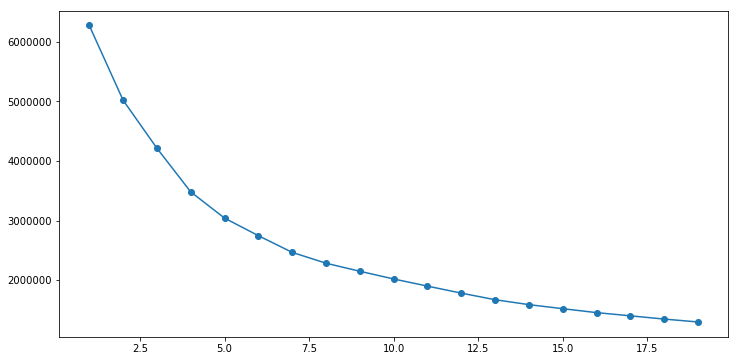

In [10]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dfclusters.num_clusters, clusters_dfclusters.cluster_errors, marker = "o" )
plt.show()

In [12]:
##Sillhoute Analysis to define cluster
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_range = range( 2, 6 )

for n_clusters in cluster_range:
# Create a subplot with 1 row and 2 columns
 fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict( X_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

y_lower = 10
for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

plt.show()

MemoryError: 